# Sendy Logistics EDA - Group 1

## Loading and viewing the data

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
sendy3 = pd.read_pickle("data/sendy2.pkl")
sendy3.head()

,order_no,user_id,vehicle_type,platform_type,customer_type,placed_day,placed_wkday,placed_time,confirmed_day,confirmed_wkday,...,pickup_lat,pickup_long,delivered_lat,delivered_long,Rider Id,time_pickup_to_delivered,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,1900-01-01 09:35:46,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,1900-01-01 11:16:16,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,1900-01-01 12:39:25,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,1900-01-01 09:25:34,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,1900-01-01 09:55:18,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [3]:
sendy3.columns

Index(['order_no', 'user_id', 'vehicle_type', 'platform_type', 'customer_type',
       'placed_day', 'placed_wkday', 'placed_time', 'confirmed_day',
       'confirmed_wkday', 'confirmed_time', 'arrive_pickup_day',
       'arrive_pickup_wkday', 'arrive_pickup_time', 'pickup_day',
       'pickup_wkday', 'pickup_time', 'delivered_day', 'delivered_wkday',
       'delivered_time', 'distance_covered_km', 'temp', 'pickup_lat',
       'pickup_long', 'delivered_lat', 'delivered_long', 'Rider Id',
       'time_pickup_to_delivered', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [4]:
sendy3.shape

(21201, 32)

In [5]:
sendy3.dtypes

order_no                            object
user_id                             object
vehicle_type                        object
platform_type                       object
customer_type                       object
placed_day                          object
placed_wkday                        object
placed_time                 datetime64[ns]
confirmed_day                       object
confirmed_wkday                     object
confirmed_time              datetime64[ns]
arrive_pickup_day                   object
arrive_pickup_wkday                 object
arrive_pickup_time          datetime64[ns]
pickup_day                          object
pickup_wkday                        object
pickup_time                 datetime64[ns]
delivered_day                       object
delivered_wkday                     object
delivered_time              datetime64[ns]
distance_covered_km                  int64
temp                               float64
pickup_lat                         float64
pickup_long

## Outcome variable distribution

In [6]:
# outcome variable: time_pickup_to_delivered

sendy3.time_pickup_to_delivered.describe()

# why shortest delivery is 1 second?

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: time_pickup_to_delivered, dtype: float64

<AxesSubplot:xlabel='time_pickup_to_delivered', ylabel='Count'>

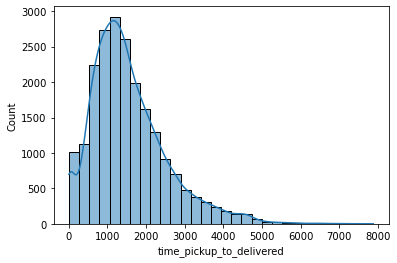

In [7]:
sns.histplot(data = sendy3, x = "time_pickup_to_delivered", bins = 30, kde = True)

# usually around 1000 seconds, or roughly 17 minutes

## Outlier detection

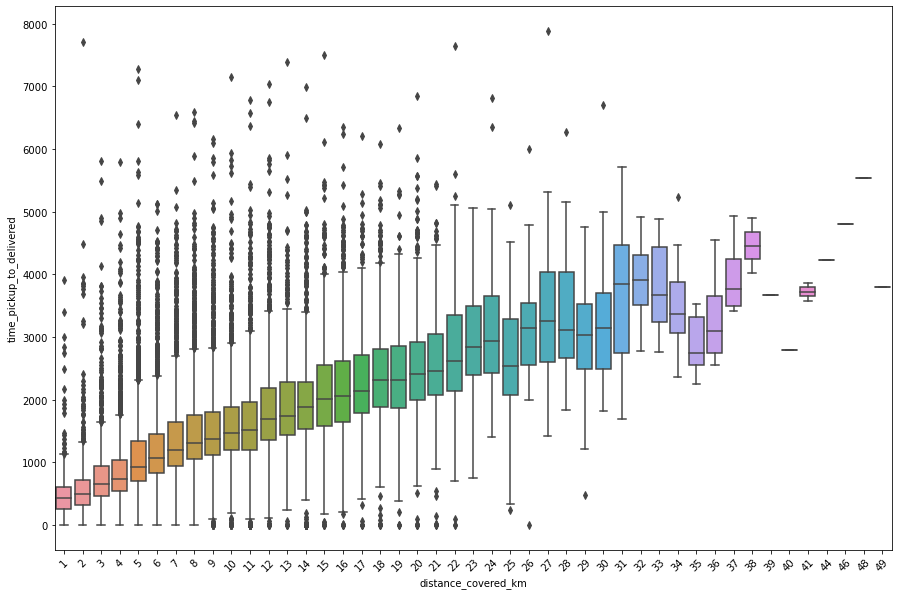

In [8]:
# outlier detection with box plots for numeric variables
# cols: distance_covered_km, Average_Rating, time_pickup_to_delivered

plt.figure(figsize = (15, 10))
dist = sns.boxplot(x = sendy3["distance_covered_km"], y = sendy3["time_pickup_to_delivered"])
dist.set_xticklabels(dist.get_xticklabels(), rotation = 45)
plt.show()

# outliers for 2km, 22km, 27km, 29km
# why does it suddenly take shorter once distance passes 33km

In [9]:
sendy3.drop(sendy3[(sendy3["distance_covered_km"] == 2) | (sendy3["distance_covered_km"] == 22) | (sendy3["distance_covered_km"] == 27) | (sendy3["distance_covered_km"] == 29)].index, inplace = True)

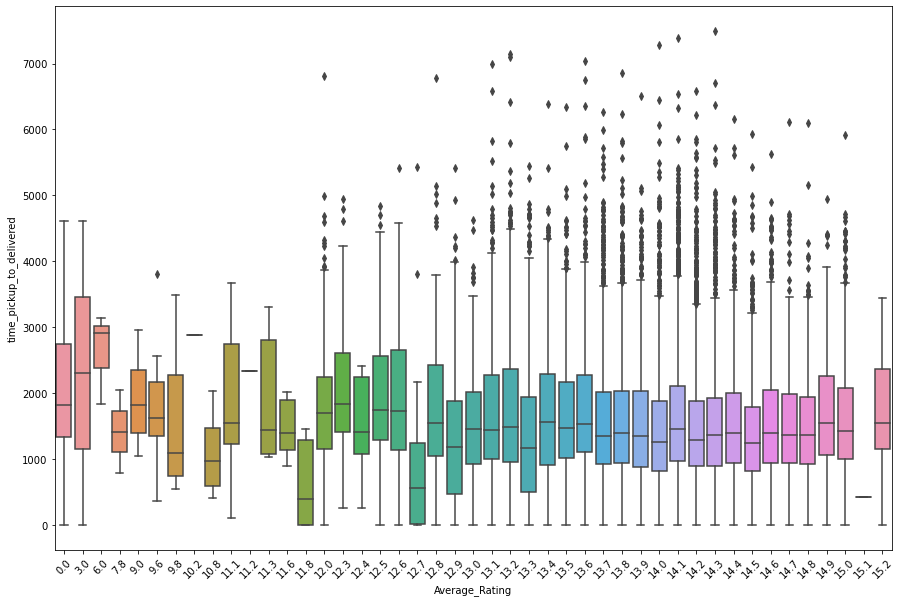

In [10]:
plt.figure(figsize = (15, 10))
dist = sns.boxplot(x = sendy3["Average_Rating"], y = sendy3["time_pickup_to_delivered"])
dist.set_xticklabels(dist.get_xticklabels(), rotation = 45)
plt.show()

# outliers for 12.0, 12.8, 13.7 rating

In [11]:
# removing outliers
sendy3.drop(sendy3[(sendy3["Average_Rating"] == 12.0) | (sendy3["Average_Rating"] == 12.8) | (sendy3["Average_Rating"] == 13.7)].index, inplace = True)

## Error detection

In [12]:
# find if all riders input the time they pickup AND deliver
sendy3.loc[:, ["pickup_time", "delivered_time"]].isnull().sum()

# no error

pickup_time       0
delivered_time    0
dtype: int64

## Definition of groups in the data

In [13]:
sendy3["pickup_hr"] = sendy3["pickup_time"].dt.hour

<AxesSubplot:>

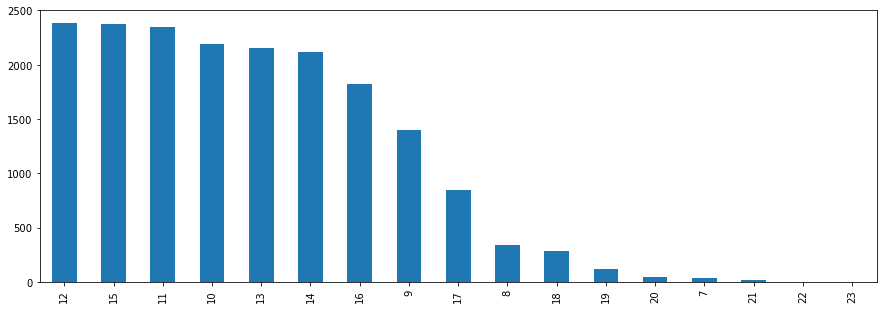

In [14]:
sendy3["pickup_hr"].value_counts().plot(kind = "bar", figsize = [15, 5])

# usually picked up from 9 am - 5pm

In [15]:
sendy3.loc[(sendy3["pickup_hr"] < 9) & (sendy3["pickup_hr"] >= 7), "pickup_hr_type"] = "Inactive Hours"
sendy3.loc[(sendy3["pickup_hr"] <= 19) & (sendy3["pickup_hr"] > 17), "pickup_hr_type"] = "Inactive Hours"
sendy3.loc[(sendy3["pickup_hr"] >= 9) & (sendy3["pickup_hr"] <= 17), "pickup_hr_type"] = "Active Hours"

# grouping pickup hrs based on inactive or active hours

In [16]:
len(sendy3[sendy3["pickup_hr_type"] == "Inactive Hours"])

779

In [17]:
len(sendy3[sendy3["pickup_hr_type"] == "Active Hours"]) # more orders picked up during active hours

17632

In [18]:
sendy3["delivered_hr"] = sendy3["delivered_time"].dt.hour

<AxesSubplot:>

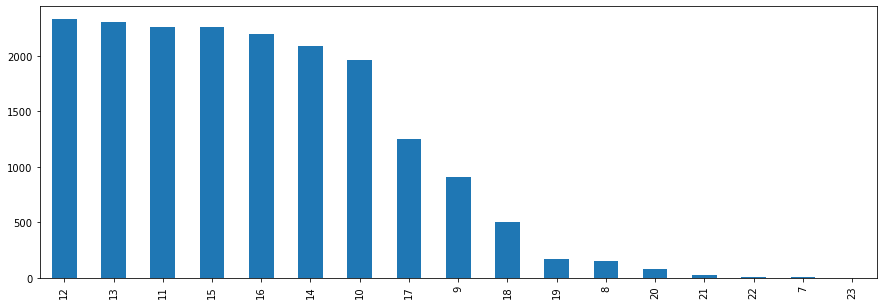

In [19]:
sendy3["delivered_hr"].value_counts().plot(kind = "bar", figsize = [15, 5])

# usually delivered around 9 am - 5 pm

In [20]:
sendy3.loc[(sendy3["delivered_hr"] < 9) & (sendy3["delivered_hr"] >= 7), "delivered_hr_type"] = "Inactive Hours"
sendy3.loc[(sendy3["delivered_hr"] <= 19) & (sendy3["delivered_hr"] > 17), "delivered_hr_type"] = "Inactive Hours"
sendy3.loc[(sendy3["delivered_hr"] >= 9) & (sendy3["delivered_hr"] <= 17), "delivered_hr_type"] = "Active Hours"

# group delivered hour to active or inactive hours

In [21]:
len(sendy3[sendy3["delivered_hr_type"] == "Inactive Hours"])

835

In [22]:
len(sendy3[sendy3["delivered_hr_type"] == "Active Hours"]) # more orders delivered during active hours

17532

<AxesSubplot:>

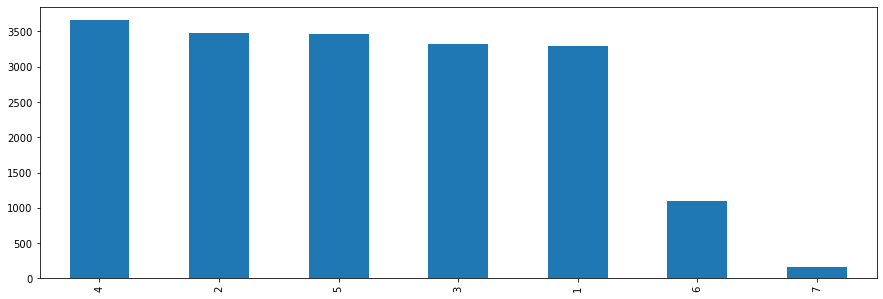

In [23]:
sendy3["arrive_pickup_wkday"].value_counts().plot(kind = "bar", figsize = [15, 5])

# most common arrival at pickup weekday: Thursday (4)
# Saturday and Sunday are not that busy (6 and 7)

<AxesSubplot:>

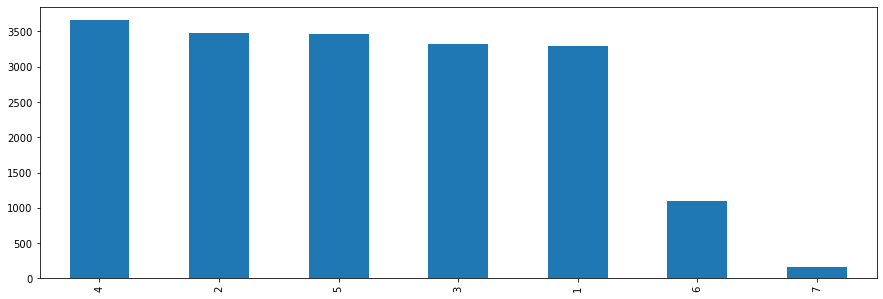

In [24]:
sendy3["delivered_wkday"].value_counts().plot(kind = "bar", figsize = [15, 5])

# most common delivery weekdays: All Weekdays
# Weekend isn't that busy

In [25]:
sendy3.loc[(sendy3["pickup_wkday"] <= 5) & (sendy3["pickup_wkday"] >= 1), "pickup_wkday_type"] = "Weekday"
sendy3.loc[(sendy3["pickup_wkday"] == 6) | (sendy3["pickup_wkday"] == 7), "pickup_wkday_type"] = "Weekend"

# group weekday whether it is a weekday or weekend

In [26]:
len(sendy3[sendy3["pickup_wkday_type"] == "Weekday"]) # more orders picked up during the week

17229

In [27]:
len(sendy3[sendy3["pickup_wkday_type"] == "Weekend"])

1254

## Other individual variable distributions

<AxesSubplot:>

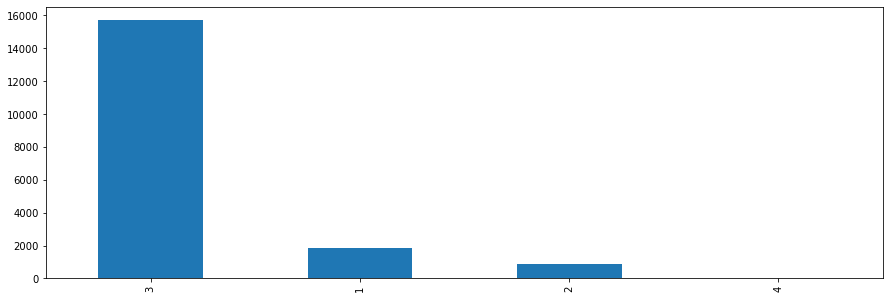

In [28]:
sendy3["platform_type"].value_counts().plot(kind = "bar", figsize = [15, 5])

# most common platform: 3

<AxesSubplot:>

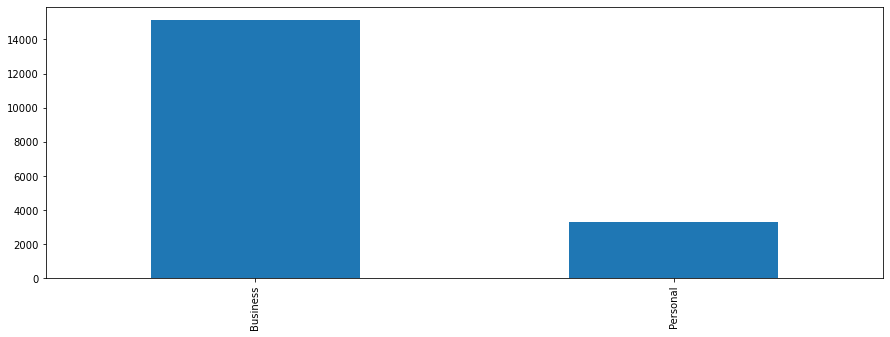

In [29]:
sendy3["customer_type"].value_counts().plot(kind = "bar", figsize = [15, 5])

# most common customer type: business

## Creating new feature: Speed

In [30]:
sendy3["speed_ms"] = (sendy3["distance_covered_km"]*1000)/sendy3["time_pickup_to_delivered"]

In [31]:
sendy3.speed_ms.describe()

# dont think anyone goes 17000 meters per second

count    18483.000000
mean        73.530740
std        551.695981
min          0.255624
25%          4.680644
50%          6.481481
75%          8.468825
max      17000.000000
Name: speed_ms, dtype: float64

<AxesSubplot:xlabel='speed_ms', ylabel='Count'>

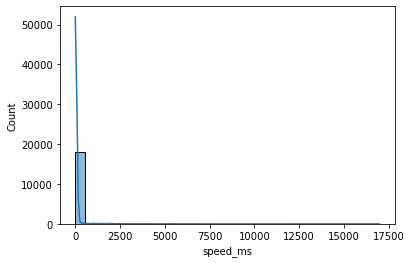

In [32]:
sns.histplot(data = sendy3, x = "speed_ms", bins = 30, kde = True)

# anything below or equal to 40m/s is reasonable
# anything above that is an outlier

In [33]:
# removing outliers
sendy3.drop(sendy3[sendy3["speed_ms"] >= 40.0].index, inplace = True)

<AxesSubplot:xlabel='speed_ms', ylabel='Count'>

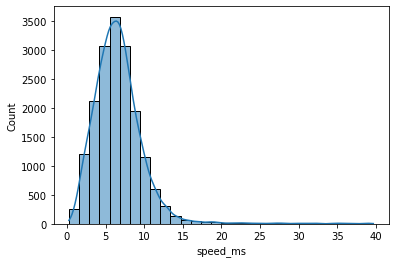

In [34]:
sns.histplot(data = sendy3, x = "speed_ms", bins = 30, kde = True)

# free of a lot of outliers

In [35]:
sendy3.speed_ms.describe()

count    17764.000000
mean         6.688161
std          3.418986
min          0.255624
25%          4.600560
50%          6.349206
75%          8.148062
max         39.647577
Name: speed_ms, dtype: float64

In [36]:
sendy3.loc[(sendy3["speed_ms"] >= 0) & (sendy3["speed_ms"] <= 11), "speed_type"] = "slow"
sendy3.loc[(sendy3["speed_ms"] > 11) & (sendy3["speed_ms"] < 22), "speed_type"] = "average"
sendy3.loc[(sendy3["speed_ms"] >= 22) & (sendy3["speed_ms"] <= 40), "speed_type"] = "fast"

# categorize speeds. 11ms = 40kmh, 22ms = 80kmh, 40ms = 144kmh. speed limit is 50kmh

In [37]:
len(sendy3[sendy3["speed_type"] == "slow"])

# well, most riders are slow

16520

In [38]:
len(sendy3[sendy3["speed_type"] == "average"])

1126

In [39]:
len(sendy3[sendy3["speed_type"] == "fast"])

118

In [41]:
sendy3.shape

(17764, 39)

## Relationships between variables

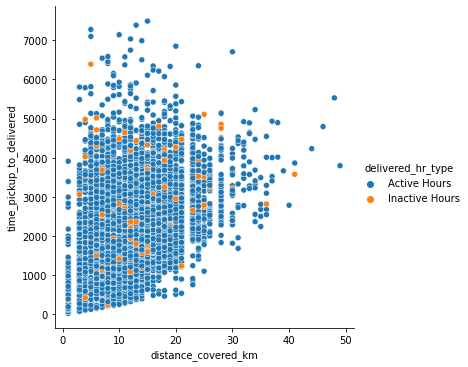

In [42]:
sns.relplot(x = "distance_covered_km", y = "time_pickup_to_delivered", data = sendy3, kind = "scatter", hue = "delivered_hr_type")

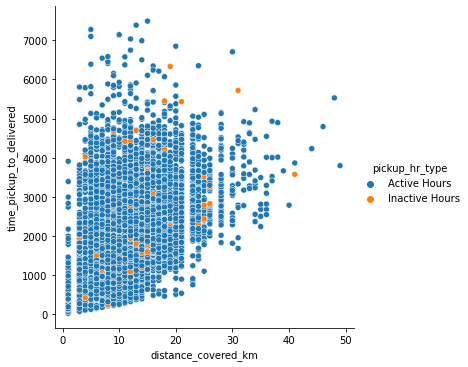

In [43]:
sns.relplot(x = "distance_covered_km", y = "time_pickup_to_delivered", data = sendy3, kind = "scatter", hue = "pickup_hr_type")

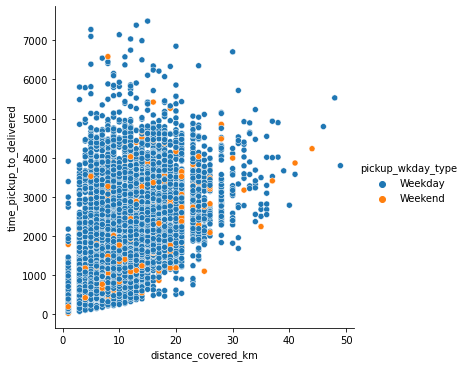

In [44]:
sns.relplot(x = "distance_covered_km", y = "time_pickup_to_delivered", data = sendy3, kind = "scatter", hue = "pickup_wkday_type")

<AxesSubplot:xlabel='platform_type', ylabel='time_pickup_to_delivered'>

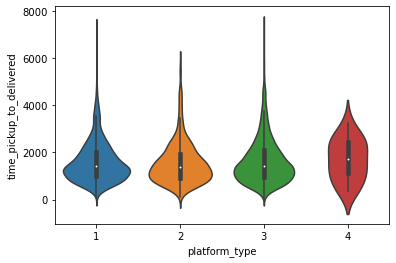

In [45]:
sns.violinplot(x = sendy3["platform_type"], y = sendy3["time_pickup_to_delivered"])

# although most common platform is 3, 1 seems to have quickest deliveries
# 4 isn't that popular at all

<AxesSubplot:xlabel='time_pickup_to_delivered', ylabel='Count'>

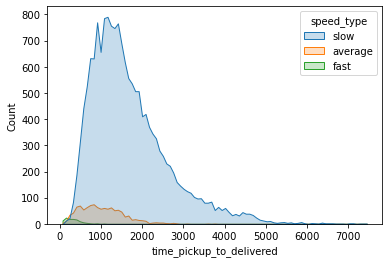

In [47]:
sns.histplot(sendy3, x = "time_pickup_to_delivered", hue = "speed_type", element = "poly")

# slow riders

<AxesSubplot:xlabel='speed_type', ylabel='time_pickup_to_delivered'>

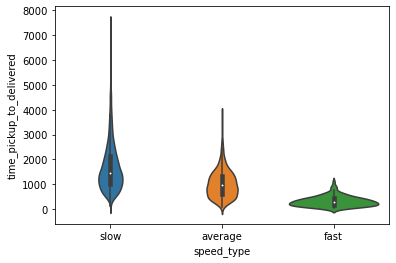

In [48]:
sns.violinplot(x = sendy3["speed_type"], y = sendy3["time_pickup_to_delivered"])

<AxesSubplot:xlabel='distance_covered_km', ylabel='time_pickup_to_delivered'>

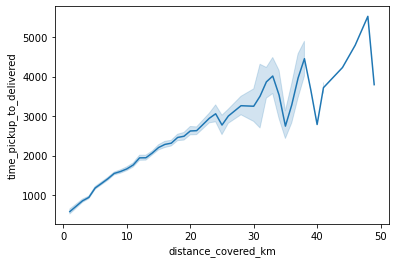

In [48]:
sns.lineplot(data = sendy3, x = "distance_covered_km", y = "time_pickup_to_delivered")

# strong positive correlation

<AxesSubplot:xlabel='distance_covered_km', ylabel='time_pickup_to_delivered'>

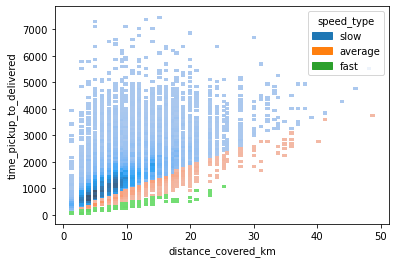

In [54]:
sns.histplot(sendy3, x = "distance_covered_km", y = "time_pickup_to_delivered", hue = "speed_type", element = "step", fill = False)

<AxesSubplot:xlabel='distance_covered_km', ylabel='speed_ms'>

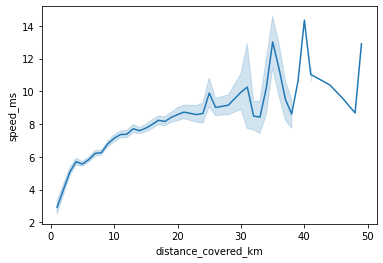

In [56]:
sns.lineplot(data = sendy3, x = "distance_covered_km", y = "speed_ms")

<AxesSubplot:xlabel='speed_ms', ylabel='time_pickup_to_delivered'>

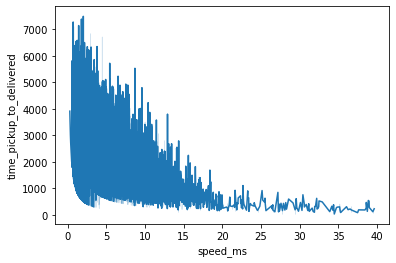

In [57]:
sns.lineplot(data = sendy3, x = "speed_ms", y = "time_pickup_to_delivered")

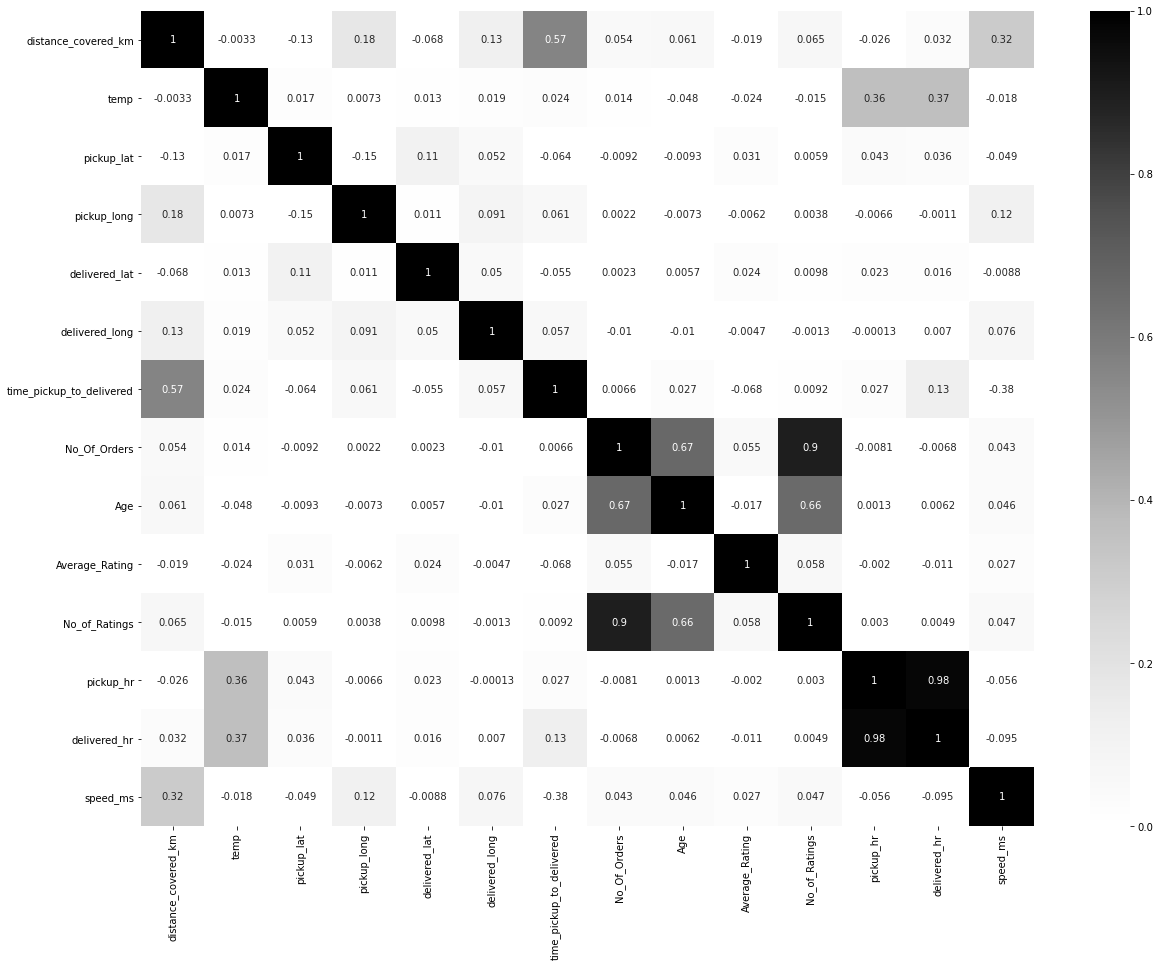

In [61]:
plt.figure(figsize = (20, 15))
heatmap = sns.heatmap(sendy3.corr(), cmap = "Greys", vmin = 1, vmax = 0, annot = True)

# highest correlations with 
# distance_covered_km

# weakest correlation with speed